In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import numpy as np


In [99]:
import plotly.graph_objects as go
capt_url = "Images/Captures d'écran/"


def df_png(dataframe, title, max_rows=7):

    df = dataframe.head(max_rows).drop(columns='id', errors='ignore')
    nb_col = len(df.columns)

    string = ""
    long_list = []
    for col in df.columns:
        string = string+col
        long_list.append(len(col))

    fig = go.Figure(data=[go.Table(

        columnwidth=[(i*20) if i > 4 else 4*40 for i in long_list],
        header=dict(values=list(df.columns),
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[df[i] for i in df.columns],
                   fill_color='white',
                   align='left',
                   height=30))])
    fig.update_layout(
        autosize=False,
        width=len(string)*10,
        height=max_rows*100,
    )
    fig.write_image(capt_url + title + ".png")


# Lecture et normalisation des données

In [100]:
df = pd.read_parquet('data\Table_Finale.parquet').set_index('Pays')

dataframe = df.drop(columns=['id', 'Année']).copy()

colonneIgnorée = ['id', 'Année', 'nb_poulets',
                  'part_Kcal_viande', 'pib', 'pib_evo', 'stab_pol_evo', 'stab_pol']

df = df.drop(columns=colonneIgnorée)

df


,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt
Pays,,,,,,,
Afghanistan,2.50,2239.0,36.0,38928350.0,2.330597,1970.6,27753.95
Afrique du Sud,11.63,2855.0,376.0,59308690.0,1.281493,12665.8,1880000.00
Albanie,7.09,3302.0,26.0,2877800.0,-0.108299,13253.7,12233.91
Algérie,2.67,3486.0,-1.0,43851040.0,1.853504,10735.4,257787.09
Allemagne,9.04,3630.0,191.0,83783940.0,0.319576,51423.2,1066000.00
...,...,...,...,...,...,...,...
Émirats arabes unis,6.34,3075.0,407.0,9890400.0,1.226853,63299.4,54101.00
Équateur,8.67,2490.0,0.0,17643050.0,1.550566,10325.0,452047.00
États-Unis d'Amérique,14.31,3920.0,-3743.0,331002650.0,0.588859,59755.2,20514868.64


In [101]:
df.describe()


,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt
count,172.000000,172.000000,172.000000,1.720000e+02,172.000000,172.000000,1.720000e+02
mean,8.317907,2924.924419,-15.947674,4.403867e+07,1.225253,19373.209684,6.872589e+05
std,4.811340,459.820140,475.302837,1.566023e+08,1.054606,19562.479844,2.269943e+06
min,0.730000,1745.000000,-4042.000000,1.082000e+04,-1.353080,731.100000,0.000000e+00
25%,4.822500,2607.250000,1.000000,2.509850e+06,0.436857,4824.600000,1.052006e+04
50%,8.065000,2923.000000,9.000000,9.493485e+06,1.096019,12579.950000,7.229296e+04
75%,11.192500,3317.750000,35.250000,3.289266e+07,1.950098,27196.675000,3.012233e+05
max,27.400000,3920.000000,1029.000000,1.439324e+09,3.843382,112557.000000,2.051487e+07


In [102]:
dfCentreReduit = df.sub(
    df.mean(numeric_only=True))
dfCentreReduit = dfCentreReduit.div(dfCentreReduit.std())

dfCentreReduit.describe().round(2)


,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.58,-2.57,-8.47,-0.28,-2.44,-0.95,-0.30
25%,-0.73,-0.69,0.04,-0.27,-0.75,-0.74,-0.30
50%,-0.05,-0.00,0.05,-0.22,-0.12,-0.35,-0.27
75%,0.60,0.85,0.11,-0.07,0.69,0.40,-0.17
max,3.97,2.16,2.20,8.91,2.48,4.76,8.73


# Première ACP

In [103]:
def correlation_graph(pca,
                      x_y,
                      features):

    # Extrait x et y
    x, y = x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0, 0,
                 pca.components_[x, i],
                 pca.components_[y, i],
                 head_width=0.07,
                 head_length=0.07,
                 width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                 pca.components_[y, i] + 0.05,
                 features[i])

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(
        x+1, round(100*pca.explained_variance_ratio_[x], 1)))
    plt.ylabel('F{} ({}%)'.format(
        y+1, round(100*pca.explained_variance_ratio_[y], 1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)


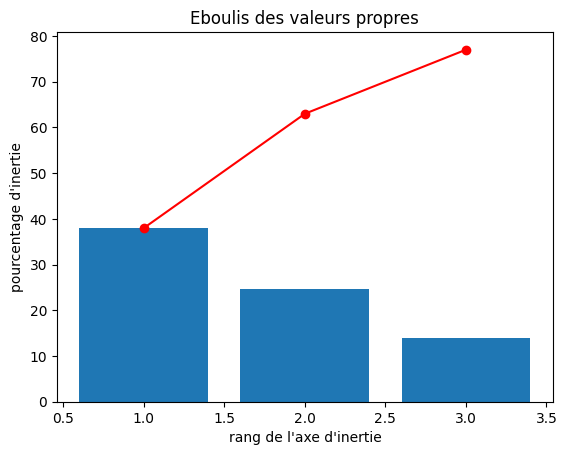

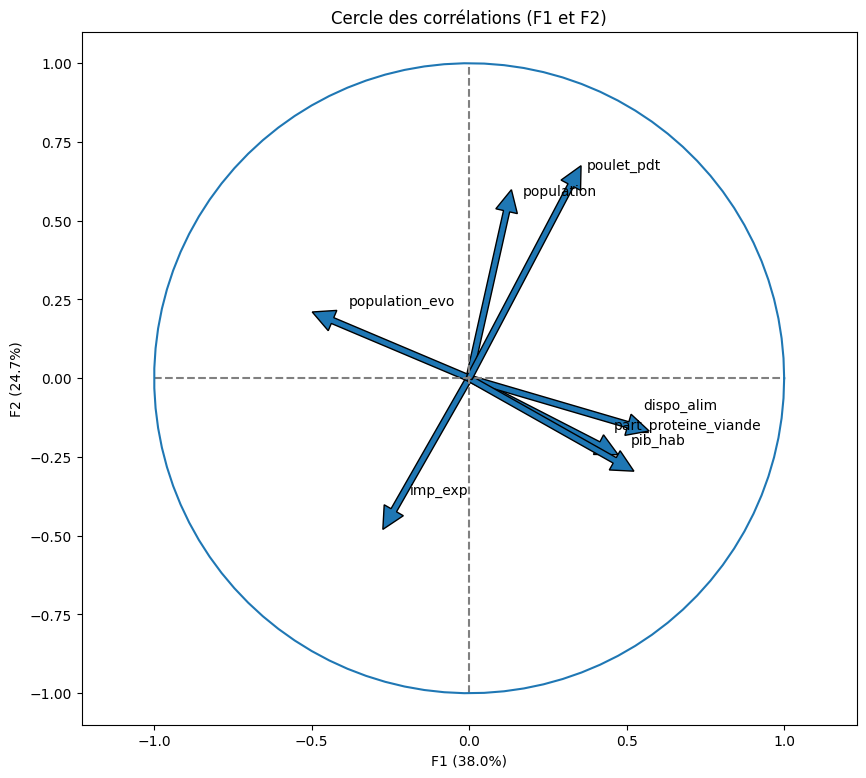

In [104]:
from sklearn.decomposition import PCA

features = dfCentreReduit.columns
names = dfCentreReduit.index

X = dfCentreReduit.values

n_components = 3
pca = PCA(n_components=n_components)
pca.fit(X)

scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
x_list = range(1, n_components+1)

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum, c="red", marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

x_y = (0, 1)
correlation_graph(pca, x_y, features)


<AxesSubplot: >

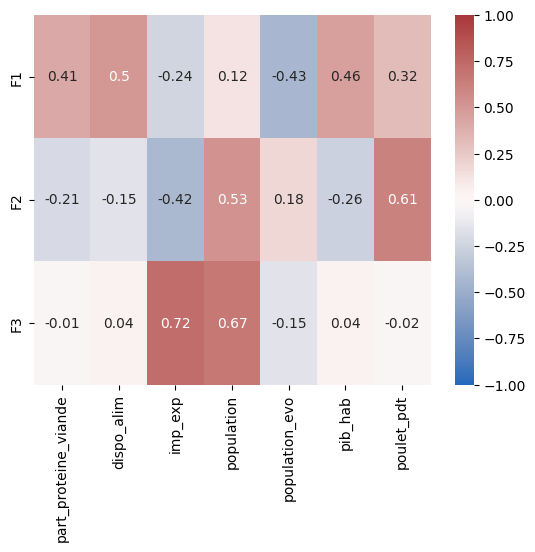

In [105]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)
sns.heatmap(pcs.round(2), vmin=-1, vmax=1, cmap="vlag", annot=True)


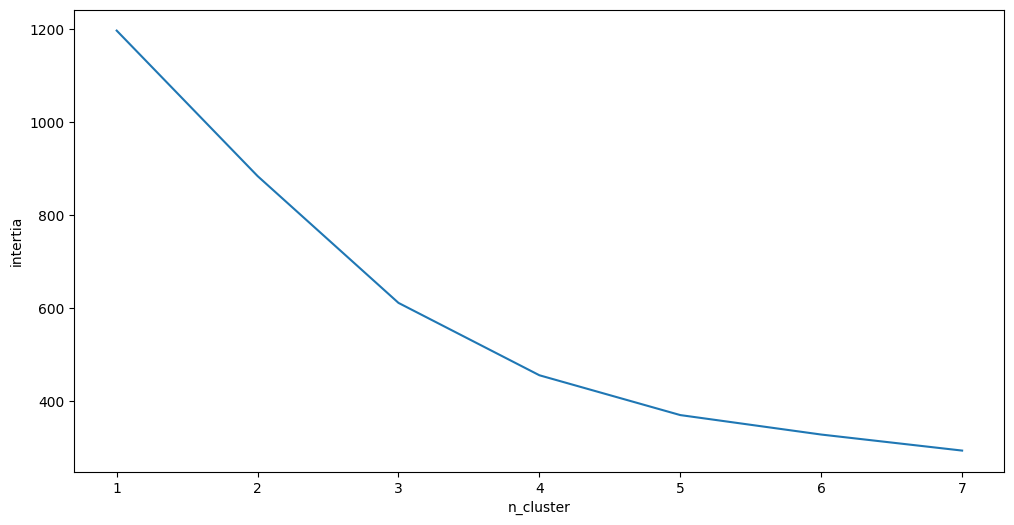

In [106]:
# K-means
from sklearn.cluster import KMeans
# Une liste vide pour enregistrer les inerties :
intertia_list = []

# Notre liste de nombres de clusters :
k_list = range(1, 8)

# Pour chaque nombre de clusters :
for k in k_list:

    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k, n_init=40)

    # On entraine
    kmeans.fit(dfCentreReduit)

    # On enregistre l'inertie obtenue :
    intertia_list.append(kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)


On choisi de garder 3 clusters

In [107]:
n_clusters = 3


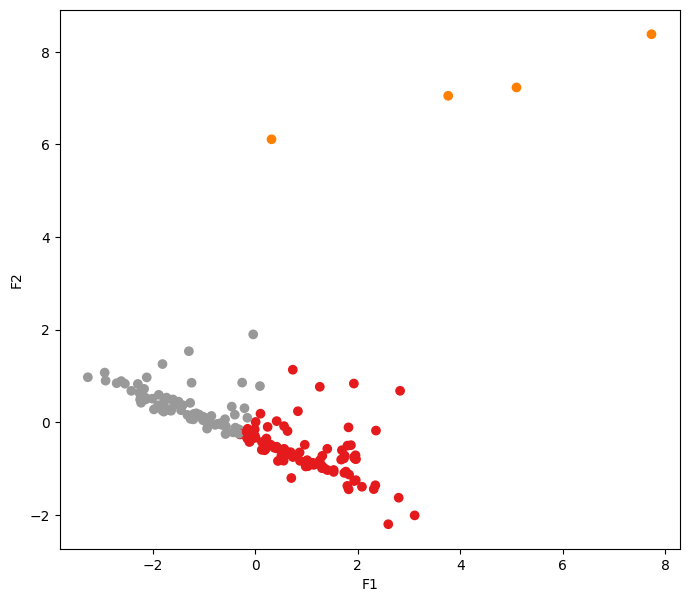

In [108]:
n_components = 3
kmeans = KMeans(n_clusters=n_clusters, n_init=50)
kmeans.fit(dfCentreReduit)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
pca = PCA(n_components=n_components)
pca.fit(dfCentreReduit)
X_proj = pca.transform(dfCentreReduit)
X_proj = pd.DataFrame(X_proj, columns=["PC"+str(i+1)
                      for i in range(n_components)])
X_proj[:10]
fig, ax = plt.subplots(1, 1, figsize=(8, 7))
ax.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c=labels, cmap="Set1")
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

fig = px.scatter_3d(X_proj, x='PC1', y='PC2', z='PC3',
                    opacity=0.3, color=labels)
fig.show()


Faisons un zoom sur les points en bas à gauche

In [109]:
df['Cluster'] = kmeans.labels_
list_cluster_petit = []
for i in range(0, n_clusters):
    long = len(df.query('Cluster==@i'))
    if (long > 0) and (long < 6):
        print("le cluster", i, "est le petit cluster")
        list_cluster_petit.append(i)


le cluster 1 est le petit cluster


In [110]:
df.query('Cluster in @list_cluster_petit')


,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt,Cluster
Pays,,,,,,,,
Brésil,14.58,3346.0,-4042.0,2.125594e+08,0.715420,14064.000000,13787480.28,1
"Chine, continentale",14.21,3343.0,1029.0,1.439324e+09,0.386397,17176.865661,14600000.00,1
Inde,0.73,2593.0,-4.0,1.380004e+09,0.994325,6186.600000,4472690.00,1
États-Unis d'Amérique,14.31,3920.0,-3743.0,3.310026e+08,0.588859,59755.200000,20514868.64,1


In [111]:
# On supprime le Brésil et les États-Unis d'Amérique qui sont 2 gros pays exportateurs de poulets.

df = df.query('Pays not in ["Brésil", "États-Unis d\'Amérique"]')

# On supprime également l'Inde qui ne mange pas beaucoup de viande et la chine car elle fausse l'analyse en créant un cluster à elle seule

df = df.query('Pays not in ["Inde", "Chine, continentale"]')

# On supprime la colonne Cluster afin de les redéfinir

df = df.drop(columns='Cluster')

dfCentreReduit = df.sub(
    df.mean(numeric_only=True))
dfCentreReduit = dfCentreReduit.div(dfCentreReduit.std())

dfCentreReduit.describe().round(2)


,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt
count,168.00,168.00,168.00,168.00,168.00,168.00,168.00
mean,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.56,-2.57,-6.27,-0.60,-2.44,-0.95,-0.52
25%,-0.72,-0.68,-0.11,-0.54,-0.75,-0.75,-0.50
50%,-0.06,0.00,-0.07,-0.39,-0.11,-0.35,-0.42
75%,0.60,0.85,0.05,0.14,0.69,0.41,-0.19
max,4.02,2.06,4.78,5.95,2.45,4.78,5.61


# ACP après avoir retiré les pays isolés

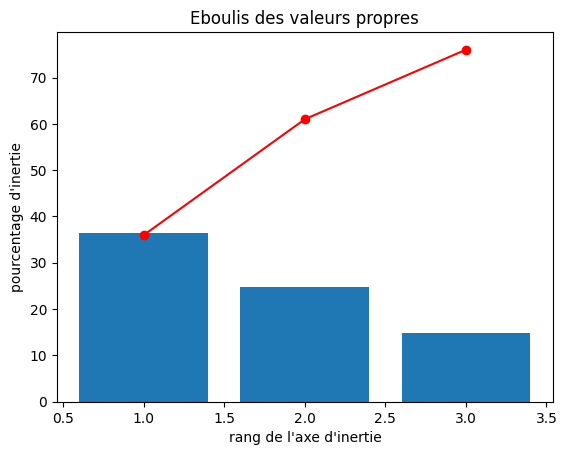

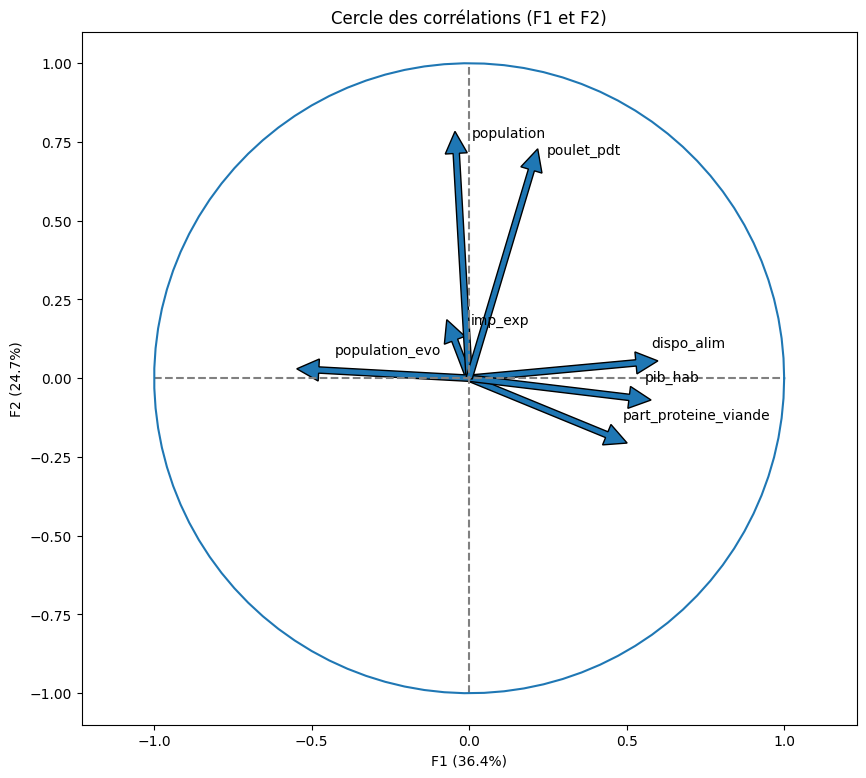

In [112]:

features = dfCentreReduit.columns
names = dfCentreReduit.index

X = dfCentreReduit.values

n_components = 3
pca = PCA(n_components=n_components)
pca.fit(X)

scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
x_list = range(1, n_components+1)

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum, c="red", marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

x_y = (0, 1)
correlation_graph(pca, x_y, features)


<AxesSubplot: >

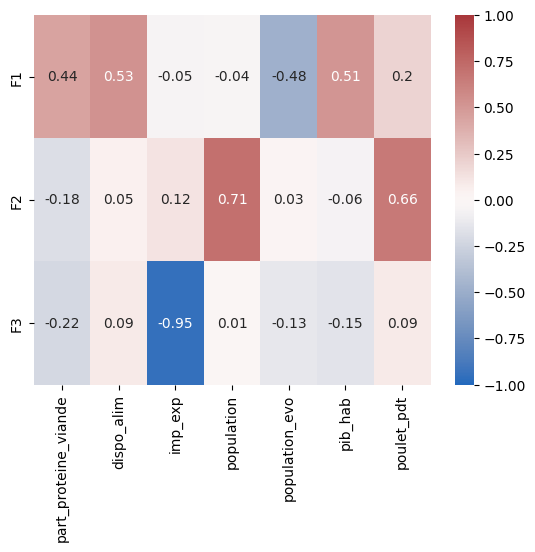

In [113]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)
sns.heatmap(pcs.round(2), vmin=-1, vmax=1, cmap="vlag", annot=True)


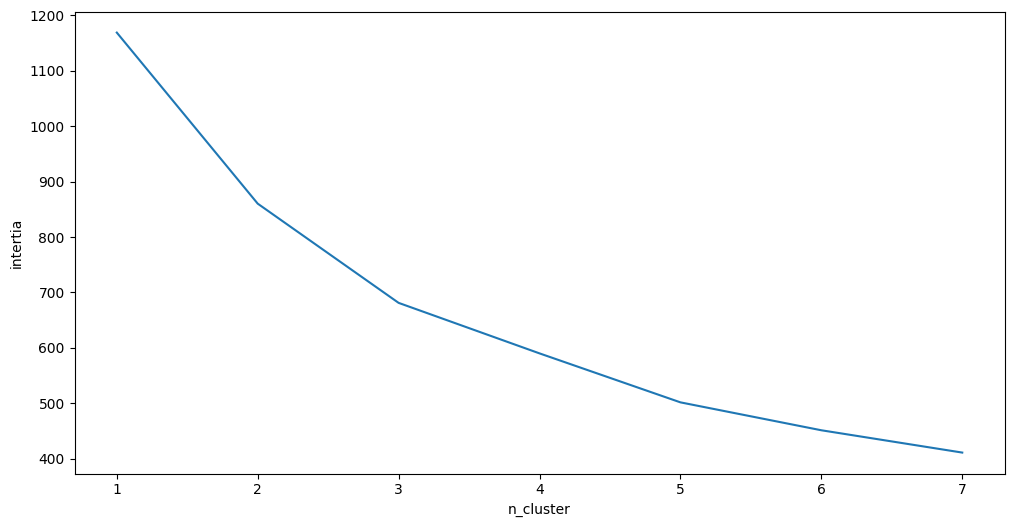

In [114]:
# K-means
from sklearn.cluster import KMeans
# Une liste vide pour enregistrer les inerties :
intertia_list = []

# Notre liste de nombres de clusters :
k_list = range(1, 8)

# Pour chaque nombre de clusters :
for k in k_list:

    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k, n_init=40)

    # On entraine
    kmeans.fit(dfCentreReduit)

    # On enregistre l'inertie obtenue :
    intertia_list.append(kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)


On choisi de garder 3 clusters

In [115]:
n_clusters = 3


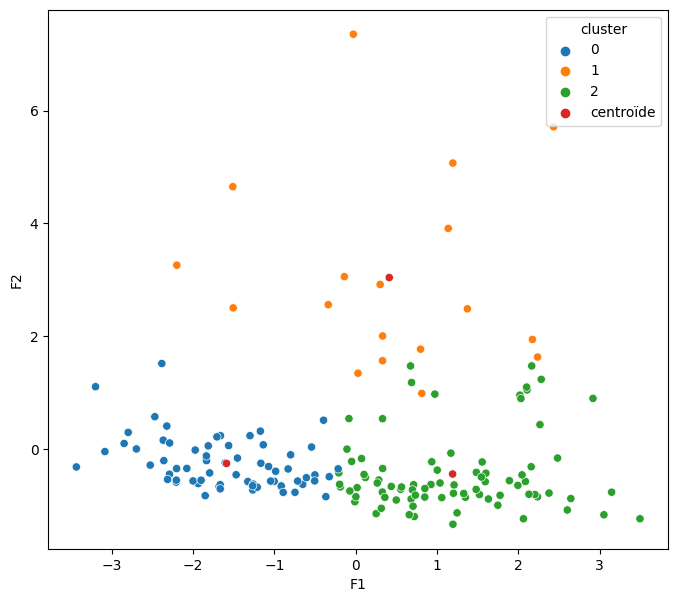

In [116]:
n_components = 3
kmeans = KMeans(n_clusters=n_clusters, n_init=50)
kmeans.fit(dfCentreReduit)
labels = kmeans.labels_
pca = PCA(n_components=n_components)
pca.fit(dfCentreReduit)
centroids = kmeans.cluster_centers_

X_proj = pca.transform(dfCentreReduit)
X_proj = pd.DataFrame(X_proj, columns=["PC"+str(i+1)
                      for i in range(n_components)])
X_proj['cluster'] = labels

centroides = X_proj.groupby(['cluster']).mean().reset_index()
centroides['cluster'] = 'centroïde'

X_proj = pd.concat([X_proj, centroides])
fig, ax = plt.subplots(1, 1, figsize=(8, 7))

ax = sns.scatterplot(X_proj, x='PC1', y='PC2', hue='cluster')

ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()


fig = px.scatter_3d(X_proj, x='PC1', y='PC2', z='PC3',
                    opacity=0.3, color='cluster')

fig.write_html("file.html")
fig.show()


In [117]:
centroids = pd.DataFrame(centroids, columns=df.columns)
centroids['Cluster'] = 'Centroides'
centroids.index.names = ['Pays']
centroids


,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt,Cluster
Pays,,,,,,,,
0,-0.700065,-0.810081,0.023982,-0.186929,0.858592,-0.719372,-0.427156,Centroides
1,-0.186708,0.281130,0.878656,2.160062,-0.105780,0.041383,2.038947,Centroides
2,0.605604,0.592953,-0.209911,-0.317553,-0.670140,0.571723,-0.097369,Centroides


In [118]:
df['Cluster'] = kmeans.labels_
dfCentreReduit['Cluster'] = kmeans.labels_
dfCentreReduit = pd.concat([dfCentreReduit, centroids])
dfCentreReduit


,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt,Cluster
Pays,,,,,,,,
Afghanistan,-1.207996,-1.485377,0.058336,0.332085,1.027347,-0.885745,-0.479426,0
Afrique du Sud,0.708405,-0.133802,1.698977,0.820455,0.040495,-0.337698,1.999957,1
Albanie,-0.244548,0.846968,0.010082,-0.531787,-1.266828,-0.307572,-0.500201,2
Algérie,-1.172312,1.250685,-0.120205,0.450046,0.578564,-0.436616,-0.171508,0
Allemagne,0.164760,1.566638,0.806275,1.406950,-0.864344,1.648323,0.910351,1
...,...,...,...,...,...,...,...,...
Éthiopie,-1.331838,-1.118960,-0.110554,2.154102,1.256267,-0.869025,-0.426021,0
Îles Salomon,-1.046371,-1.226472,-0.091252,-0.584288,1.230864,-0.859519,-0.516197,0
0,-0.700065,-0.810081,0.023982,-0.186929,0.858592,-0.719372,-0.427156,Centroides


# Classification ascendante hiérarchique (Dendogramme)

In [119]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(dfCentreReduit.drop(columns='Cluster'), method="ward")


In [120]:
from scipy.cluster.hierarchy import fcluster

dendrogram_Cluster = fcluster(
    Z, 3, criterion='maxclust')-1  # Cluster 0, 1 ou 2


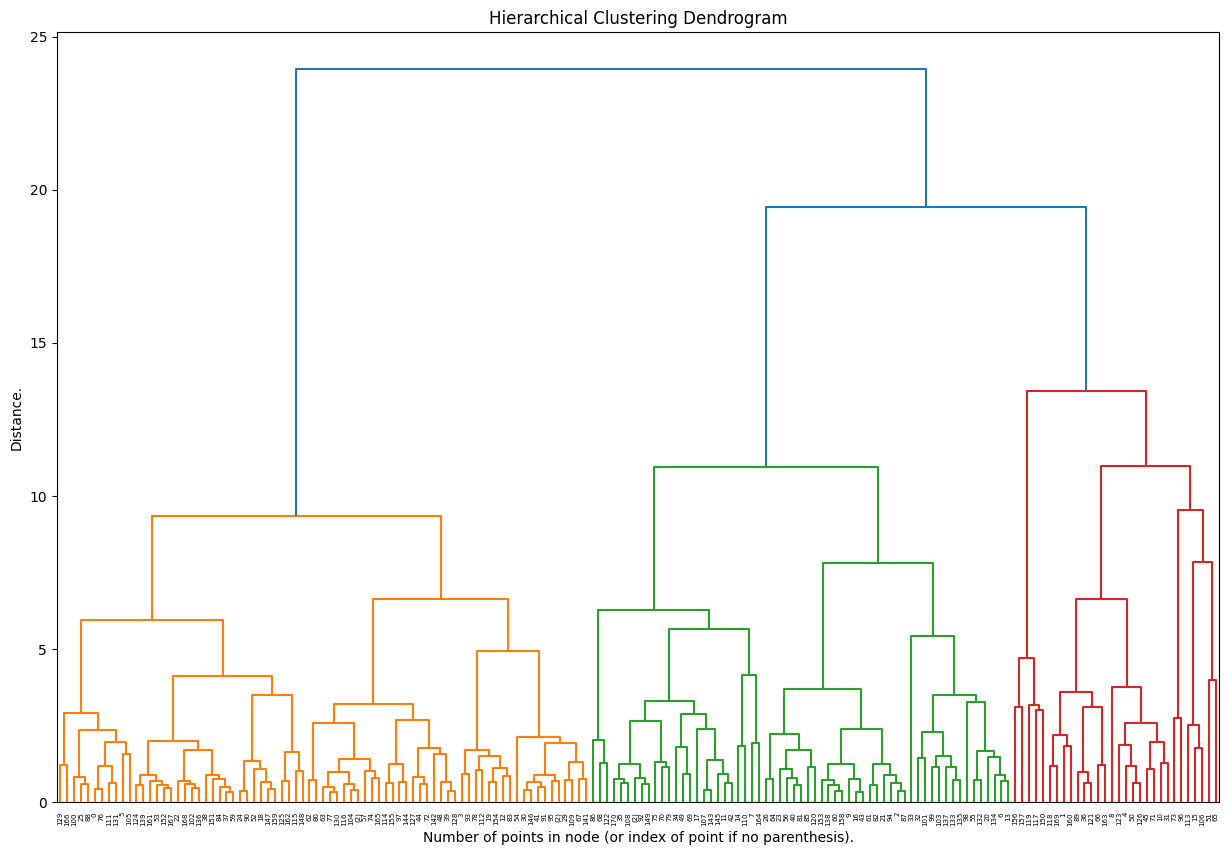

In [121]:

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

_ = dendrogram(Z, p=168, truncate_mode="lastp", ax=ax)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()


In [122]:
dfCentreReduit['Cluster_dendo'] = dendrogram_Cluster
# df['Cluster_dendo'] = dendrogram_Cluster


In [123]:
centroides = dfCentreReduit.groupby(['Cluster_dendo']).mean().reset_index()
centroides['Cluster_dendo'] = 'Centroides Dendogramme'
centroides['Pays'] = "Centroides Dendogramme"
centroides = centroides.set_index("Pays")
centroides

C:\Users\thebe\AppData\Local\Temp\ipykernel_7208\3537131777.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Cluster_dendo,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt
Pays,,,,,,,,
Centroides Dendogramme,Centroides Dendogramme,-0.619847,-0.659868,0.014106,-0.207544,0.682720,-0.668928,-0.409540
Centroides Dendogramme,Centroides Dendogramme,0.720932,0.585947,0.050507,-0.456793,-0.670014,0.704832,-0.339876
Centroides Dendogramme,Centroides Dendogramme,0.132964,0.528829,-0.118435,1.545759,-0.410378,0.301316,1.831346


In [124]:
dfCentreReduit = pd.concat([dfCentreReduit, centroides])
dfCentreReduit

,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt,Cluster,Cluster_dendo
Pays,,,,,,,,,
Afghanistan,-1.207996,-1.485377,0.058336,0.332085,1.027347,-0.885745,-0.479426,0,0
Afrique du Sud,0.708405,-0.133802,1.698977,0.820455,0.040495,-0.337698,1.999957,1,2
Albanie,-0.244548,0.846968,0.010082,-0.531787,-1.266828,-0.307572,-0.500201,2,1
Algérie,-1.172312,1.250685,-0.120205,0.450046,0.578564,-0.436616,-0.171508,0,0
Allemagne,0.164760,1.566638,0.806275,1.406950,-0.864344,1.648323,0.910351,1,2
...,...,...,...,...,...,...,...,...,...
1,-0.186708,0.281130,0.878656,2.160062,-0.105780,0.041383,2.038947,Centroides,2
2,0.605604,0.592953,-0.209911,-0.317553,-0.670140,0.571723,-0.097369,Centroides,1
Centroides Dendogramme,-0.619847,-0.659868,0.014106,-0.207544,0.682720,-0.668928,-0.409540,NaN,Centroides Dendogramme


# Comparons les deux méthodes

In [125]:
pd.crosstab(dfCentreReduit.Cluster, dfCentreReduit.Cluster_dendo)


Cluster_dendo,0,1,2
Cluster,,,
0,66,1,0
1,0,1,17
2,12,59,12
Centroides,1,1,1


In [126]:
dfCentreReduit['Cluster_dendo'] = dfCentreReduit['Cluster_dendo'].map({
    0: 0,
    1: 2,
    2: 1,
    "Centroides Dendogramme":"Centroides Dendogramme"
})


In [127]:
dfCentreReduit.query("Cluster != Cluster_dendo")


,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt,Cluster,Cluster_dendo
Pays,,,,,,,,,
Arabie saoudite,-0.311716,0.860133,2.760569,0.233490,0.331987,1.285850,0.688147,1,2
Argentine,2.324647,0.921568,-0.964652,0.482269,-0.293019,0.022275,2.454055,2,1
Australie,1.476645,1.105874,-0.308396,0.010301,-0.057654,1.507688,1.152024,2,1
Azerbaïdjan,-0.435558,1.090515,0.034209,-0.357784,-0.308713,-0.283330,-0.362121,2,0
Canada,0.372563,1.459126,0.077637,0.303660,-0.332440,1.373720,1.229838,2,1
Costa Rica,-0.299122,0.254557,-0.042998,-0.478678,-0.297266,0.034906,-0.332522,2,0
Espagne,0.825950,0.947897,-0.346999,0.519628,-1.128728,0.868809,1.359325,2,1
Fidji,-0.318013,-0.017514,-0.100903,-0.579266,-0.477918,-0.396053,-0.482620,2,0
France,0.849039,1.362585,0.565004,0.963388,-0.957296,1.181879,0.996020,2,1


# Affichons la carte du monde

In [128]:
iso3 = pd.read_csv('data\FAOSTAT_Code_pays_vers_ISO3.csv')[
    ['Pays', 'Code ISO3']].rename(columns={'Code ISO3': 'iso3'})
iso3


,Pays,iso3
0,Afghanistan,AFG
1,Afrique,X06
2,Afrique australe,F5104
3,Afrique centrale,F5102
4,Afrique du Nord (Soudan Excl),F429
...,...,...
338,Yémen,YEM
339,Yemen Dém,F247
340,Yémen Rép A,F246
341,Zambie,ZMB


In [129]:
import plotly.express as px

df = pd.merge(df.reset_index(), iso3, on='Pays', how='left')
dfCentreReduit = pd.merge(dfCentreReduit.reset_index(),
                          iso3, on='Pays', how='left')

iso3_continent_url = 'https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv'

continent = pd.read_csv(iso3_continent_url)[
    ['alpha-3', 'region']].rename(columns={"alpha-3": "iso3", "region": "continent"})

continent


,iso3,continent
0,AFG,Asia
1,ALA,Europe
2,ALB,Europe
3,DZA,Africa
4,ASM,Oceania
...,...,...
244,WLF,Oceania
245,ESH,Africa
246,YEM,Asia
247,ZMB,Africa


In [130]:
dfCentreReduit


,Pays,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt,Cluster,Cluster_dendo,iso3
0,Afghanistan,-1.207996,-1.485377,0.058336,0.332085,1.027347,-0.885745,-0.479426,0,0,AFG
1,Afrique du Sud,0.708405,-0.133802,1.698977,0.820455,0.040495,-0.337698,1.999957,1,1,ZAF
2,Albanie,-0.244548,0.846968,0.010082,-0.531787,-1.266828,-0.307572,-0.500201,2,2,ALB
3,Algérie,-1.172312,1.250685,-0.120205,0.450046,0.578564,-0.436616,-0.171508,0,0,DZA
4,Allemagne,0.164760,1.566638,0.806275,1.406950,-0.864344,1.648323,0.910351,1,1,DEU
...,...,...,...,...,...,...,...,...,...,...,...
169,1,-0.186708,0.281130,0.878656,2.160062,-0.105780,0.041383,2.038947,Centroides,1,NaN
170,2,0.605604,0.592953,-0.209911,-0.317553,-0.670140,0.571723,-0.097369,Centroides,2,NaN
171,Centroides Dendogramme,-0.619847,-0.659868,0.014106,-0.207544,0.682720,-0.668928,-0.409540,NaN,Centroides Dendogramme,NaN
172,Centroides Dendogramme,0.720932,0.585947,0.050507,-0.456793,-0.670014,0.704832,-0.339876,NaN,Centroides Dendogramme,NaN


In [131]:
dfCentreReduit = pd.merge(dfCentreReduit.reset_index(), continent, on='iso3', how='left').set_index(
    'Pays').drop(columns="index")  # .drop(columns='iso_alpha')

dataframe = dataframe.sub(
    dataframe.mean(numeric_only=True))
dataframe = dataframe.div(dataframe.std())


dfCentreReduit = pd.merge(dfCentreReduit, dataframe,
                          on='Pays', suffixes=('', '_y'), how='left')
dfCentreReduit.drop(dfCentreReduit.filter(
    regex='_y$').columns, axis=1, inplace=True)

dfCentreReduit['Cluster'] = dfCentreReduit['Cluster'].astype('category')
dfCentreReduit['Cluster_dendo'] = dfCentreReduit['Cluster_dendo'].astype('category')

dfCentreReduit.describe()


,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt,part_Kcal_viande,stab_pol,stab_pol_evo,pib_evo,nb_poulets,pib
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,-0.000271,0.002982,0.003672,0.014580,-0.001810,0.001327,0.014922,-0.005730,0.006243,0.004154,-0.007948,-0.096390,-0.123039
std,0.987826,0.988792,0.984948,1.004055,0.989191,0.988023,1.005613,0.987574,1.009253,1.008582,1.007260,0.608494,0.312637
min,-1.560630,-2.569271,-6.272609,-0.600488,-2.437746,-0.949260,-0.516577,-1.813998,-2.913320,-2.224472,-6.416268,-0.278187,-0.281265
25%,-0.712636,-0.672457,-0.110554,-0.538774,-0.731566,-0.737059,-0.502362,-0.670032,-0.616983,-0.175082,-0.352767,-0.269396,-0.270868
50%,-0.057735,0.015398,-0.067125,-0.373257,-0.110238,-0.342097,-0.419807,0.019789,0.067793,-0.100560,0.120020,-0.240695,-0.246347
75%,0.604017,0.805280,0.052760,0.147127,0.681268,0.419163,-0.172440,0.579343,0.873574,-0.015824,0.439938,-0.162119,-0.149188
max,4.018552,2.060314,4.782418,5.953643,2.450365,4.780962,5.609754,3.094585,1.728857,10.076478,6.386143,6.640785,1.683524


In [132]:
dfCentreReduit


,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt,Cluster,Cluster_dendo,iso3,continent,part_Kcal_viande,stab_pol,stab_pol_evo,pib_evo,nb_poulets,pib
Pays,,,,,,,,,,,,,,,,,
Afghanistan,-1.207996,-1.485377,0.058336,0.332085,1.027347,-0.885745,-0.479426,0,0,AFG,Asia,-1.389493,-2.913320,-0.086875,0.162938,-0.251652,-0.251480
Afrique du Sud,0.708405,-0.133802,1.698977,0.820455,0.040495,-0.337698,1.999957,1,1,ZAF,Africa,1.162321,-0.174216,-0.174314,-0.237162,0.052209,0.010899
Albanie,-0.244548,0.846968,0.010082,-0.531787,-1.266828,-0.307572,-0.500201,2,2,ALB,Europe,-0.653301,0.177797,-0.277143,0.379140,-0.265069,-0.266484
Algérie,-1.172312,1.250685,-0.120205,0.450046,0.578564,-0.436616,-0.171508,0,0,DZA,Africa,-1.334039,-0.856242,-0.213740,-0.133435,-0.013823,-0.098192
Allemagne,0.164760,1.566638,0.806275,1.406950,-0.864344,1.648323,0.910351,1,1,DEU,Europe,0.267417,0.826822,0.008005,0.152937,-0.240695,1.394700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,-0.186708,0.281130,0.878656,2.160062,-0.105780,0.041383,2.038947,Centroides,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.605604,0.592953,-0.209911,-0.317553,-0.670140,0.571723,-0.097369,Centroides,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Centroides Dendogramme,-0.619847,-0.659868,0.014106,-0.207544,0.682720,-0.668928,-0.409540,NaN,Centroides Dendogramme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
"""dfCentreReduit['Cluster'] = dfCentreReduit['Cluster'].map({0:1,
                                                           1:2,
                                                           2:0})"""
dfCentreReduit['Cluster'] = dfCentreReduit['Cluster'].astype('category')

fig = px.choropleth(dfCentreReduit, locations="iso3", color="Cluster",
                    width=1800, height=700)

fig.show()


In [137]:
fig = px.choropleth(dfCentreReduit, locations="iso3", color="Cluster_dendo",
                    width=1800, height=700)

fig.show()


In [138]:
pd.crosstab(dfCentreReduit.Cluster, dfCentreReduit.continent, normalize='index')


continent,Africa,Americas,Asia,Europe,Oceania
Cluster,,,,,
0.0,0.048193,0.240964,0.240964,0.409639,0.060241
1.0,0.626866,0.119403,0.179104,0.000000,0.074627
2.0,0.166667,0.166667,0.500000,0.166667,0.000000


In [139]:
pd.crosstab(dfCentreReduit.Cluster, dfCentreReduit.continent, normalize='columns')


continent,Africa,Americas,Asia,Europe,Oceania
Cluster,,,,,
0.0,0.081633,0.645161,0.487805,0.918919,0.5
1.0,0.857143,0.258065,0.292683,0.000000,0.5
2.0,0.061224,0.096774,0.219512,0.081081,0.0


# Choix de la méthode

Comparons les 6 centroïdes

In [140]:
dfCentreReduit.query("Cluster=='Centroides' or Cluster_dendo=='Centroides Dendogramme'")

,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt,Cluster,Cluster_dendo,iso3,continent,part_Kcal_viande,stab_pol,stab_pol_evo,pib_evo,nb_poulets,pib
Pays,,,,,,,,,,,,,,,,,
Centroides Dendogramme,-0.619847,-0.659868,0.014106,-0.207544,0.682720,-0.668928,-0.409540,NaN,Centroides Dendogramme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Centroides Dendogramme,0.720932,0.585947,0.050507,-0.456793,-0.670014,0.704832,-0.339876,NaN,Centroides Dendogramme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Centroides Dendogramme,0.132964,0.528829,-0.118435,1.545759,-0.410378,0.301316,1.831346,NaN,Centroides Dendogramme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Choix du Cluster

Choisissons maintenant le Cluster dans lequel nous voudrons exporter nos poulets

Nous ciblerons de préférence un pays ayant :
 <br>
 > Ayant un fort PIB par habitant,
 <br>
 Une grande consommation de viandes de volailles,
 <br>
 Une grande quantité d'importation,
 <br>
 Une forte disponibilité alimentaire

In [141]:
meanprops = {"marker": ".",
             "markerfacecolor": "white",
             "markeredgecolor": "black",
             "markersize": 15}


In [142]:
dfCentreReduitCentroid = dfCentreReduit.query("(Cluster=='Centroides') or ( Cluster_dendo=='Centroides Dendogramme')")
dfCentreReduitCentroid

dfCentreReduit = dfCentreReduit.query("(Cluster!='Centroides') and ( Cluster_dendo!='Centroides Dendogramme')")

## Étude sur le PIB

<AxesSubplot: xlabel='Cluster', ylabel='pib_hab'>

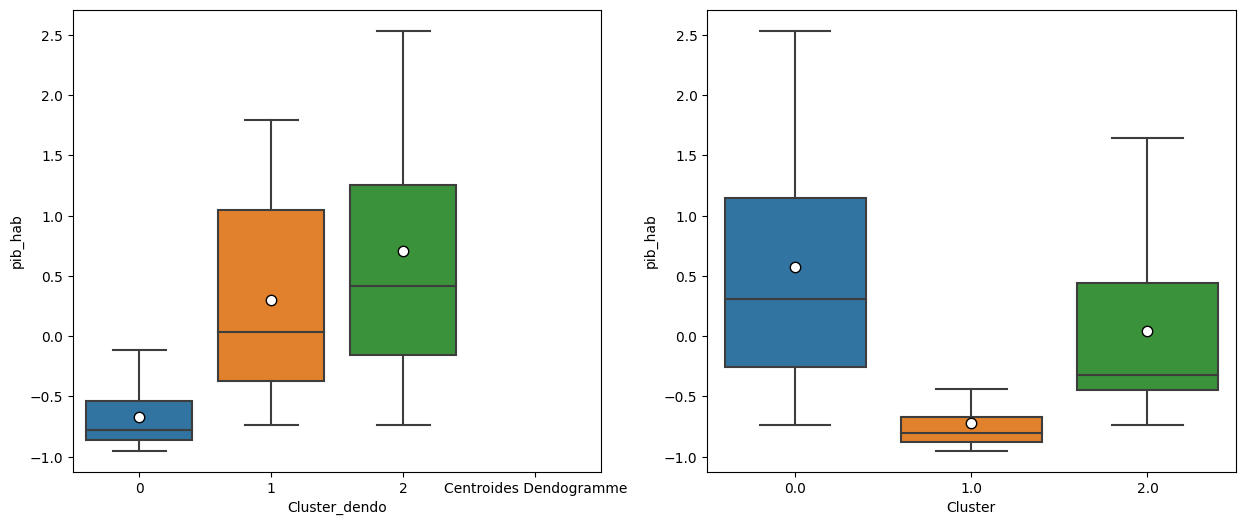

In [143]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(dfCentreReduit, x='Cluster_dendo', y='pib_hab', ax=ax1,
            showfliers=False, showmeans=True, meanprops=meanprops)
sns.boxplot(dfCentreReduit, x='Cluster', y='pib_hab', ax=ax2,
            showfliers=False, showmeans=True, meanprops=meanprops)


## Étude sur la disponibilité alimentaire

<AxesSubplot: xlabel='Cluster', ylabel='dispo_alim'>

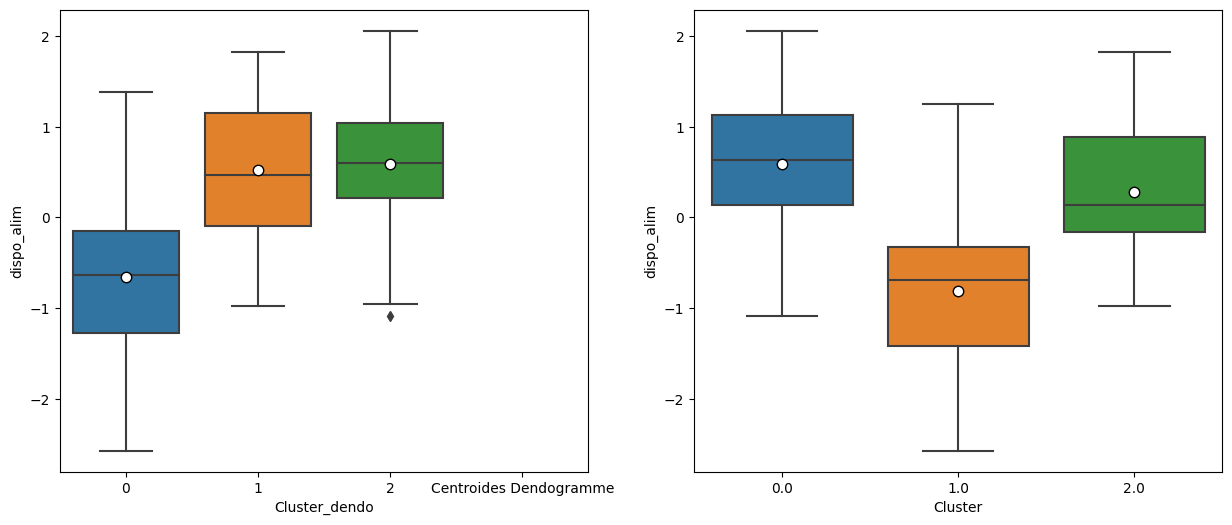

In [144]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(dfCentreReduit, x='Cluster_dendo', y='dispo_alim',
            ax=ax1, showmeans=True, meanprops=meanprops)
sns.boxplot(dfCentreReduit, x='Cluster', y='dispo_alim', ax=ax2,
            showfliers=False, showmeans=True, meanprops=meanprops)


## Étude sur la part de la viande dans la consommation alimentaire

<AxesSubplot: xlabel='Cluster', ylabel='part_proteine_viande'>

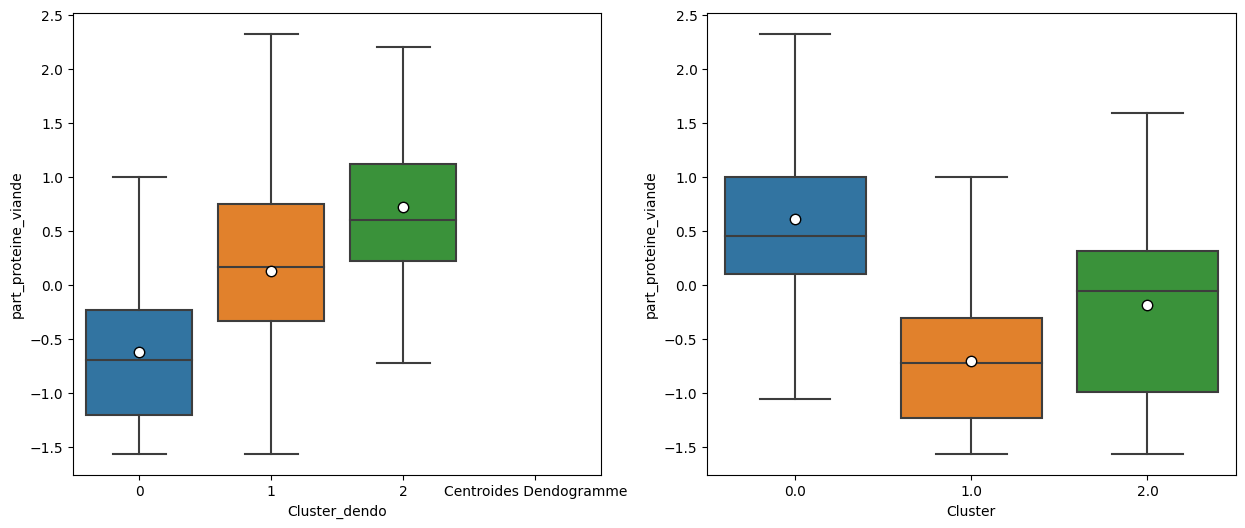

In [145]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(dfCentreReduit, x='Cluster_dendo', y='part_proteine_viande',
            showfliers=False, ax=ax1, showmeans=True, meanprops=meanprops)
sns.boxplot(dfCentreReduit, x='Cluster', y='part_proteine_viande',
            ax=ax2, showmeans=True, meanprops=meanprops, showfliers=False)


## Étude sur les imports-exports de poulets

<AxesSubplot: xlabel='Cluster', ylabel='imp_exp'>

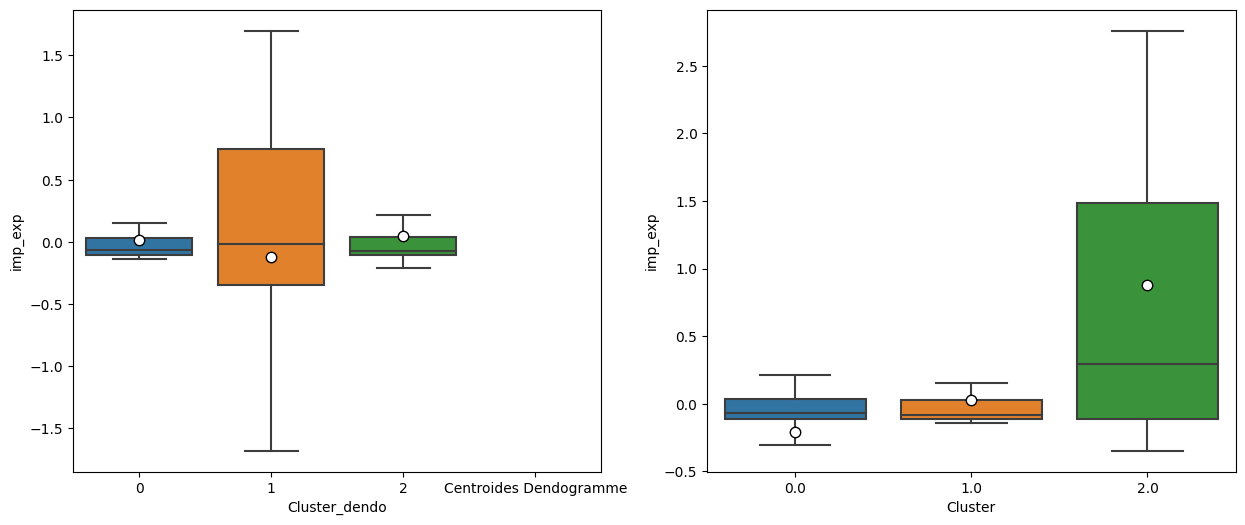

In [146]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(dfCentreReduit, x='Cluster_dendo', y='imp_exp',
            showfliers=False, showmeans=True, meanprops=meanprops, ax=ax1)
sns.boxplot(dfCentreReduit, x='Cluster', y='imp_exp',
            showmeans=True, meanprops=meanprops, showfliers=False, ax=ax2)


## Étude sur la production interne de viande de poulet

<AxesSubplot: xlabel='Cluster', ylabel='poulet_pdt'>

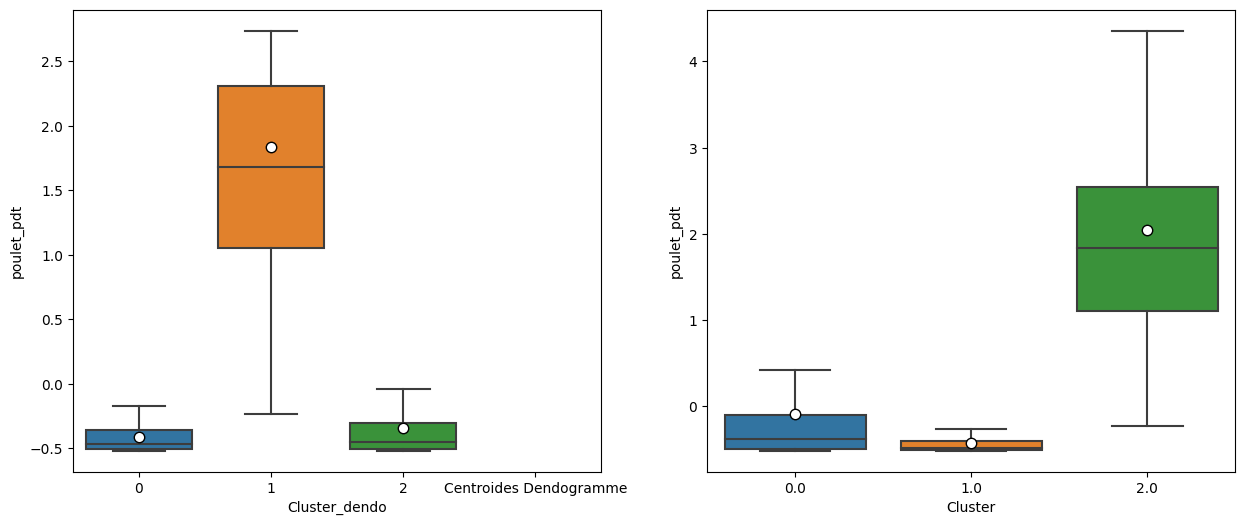

In [147]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(dfCentreReduit, x='Cluster_dendo', y='poulet_pdt', ax=ax1,
            showfliers=False, showmeans=True, meanprops=meanprops)
sns.boxplot(dfCentreReduit, x='Cluster', y='poulet_pdt',
            showfliers=False, ax=ax2, showmeans=True, meanprops=meanprops)


# Tableau récapitulatif

In [148]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


def creerTableau(tab):

    signe_to_int = {"--": 0, "-": 1, "+": 2, "++": 3, " ": 4}
    colors = ['red', "salmon", "lightgreen", "mediumseagreen", "lightgrey"]

    Liste_col_int = [np.array(tab[col].map(signe_to_int))
                     for col in list(tab.columns)]
    col = ["paleturquoise"] + [np.array(colors)[col_val_map]
                               for col_val_map in Liste_col_int]

    tab = tab.reset_index(names="Critère\Cluster")

    fig = go.Figure(data=[go.Table(
        header=dict(values=list(tab.columns),
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[tab[i] for i in tab.columns],
                   fill_color=col,
                   align='left'))
    ])

    fig.show()
    return


In [164]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


def creerTableau(tab, tab2, name, name2):

    fig = make_subplots(rows=1, cols=2, specs=[[{"type": "table"}, {
                        "type": "table"}]], row_heights=[1000], column_widths=[2000, 2000])

    signe_to_int = {"--": 0, "-": 1, "+": 2, "++": 3, " ": 4}
    colors = ['red', "salmon", "lightgreen", "mediumseagreen", "lightgrey"]

    Liste_col_int = [np.array(tab[col].map(signe_to_int))
                     for col in list(tab.columns)]
    col = ["paleturquoise"] + [np.array(colors)[col_val_map]
                               for col_val_map in Liste_col_int]

    tab = tab.reset_index(names=name)
    fig.add_trace(go.Table(
        header=dict(values=list(tab.columns),
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[tab[i] for i in tab.columns],
                   fill_color=col,
                   align='left')), row=1, col=1)

    Liste_col_int = [np.array(tab2[col].map(signe_to_int))
                     for col in list(tab2.columns)]
    col = ["paleturquoise"] + [np.array(colors)[col_val_map]
                               for col_val_map in Liste_col_int]

    tab2 = tab2.reset_index(names=name2)
    fig.add_trace(go.Table(
        header=dict(values=list(tab2.columns),
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[tab2[i] for i in tab2.columns],
                   fill_color=col,
                   align='left')), col=2, row=1)

    fig.show()
    return


In [150]:
df['Cluster'].value_counts()


2    83
0    67
1    18
Name: Cluster, dtype: int64

In [167]:

Critére = ["PIB", "disponibilité alimentaire", "Part de la viande",
           "imports-exports", "Production de viande de poulet"]
colonne = [i for i in range(0, n_clusters)]

tableau = pd.DataFrame(index=Critére, columns=colonne)

list_0 = ["-", " ", " ", " ", "+"]  # PAYS PRODUCTEURS (AFRIQUE)
list_1 = ["+", "+", "+", " ", "-"]  # Europe
list_2 = ["++", "+", "+", " ", "+"]  # Russie + autres

list_all = [list_0, list_1, list_2]
clust = 0
for liste in list_all:
    for i, j in zip(liste, Critére):
        tableau.at[j, clust] = i
    clust = clust + 1

tableau_Kmean = pd.DataFrame(index=Critére, columns=colonne)

list_0 = ["++", "+", "+", " ", " "]  # PAYS PRODUCTEURS (AFRIQUE)
list_1 = ["-", " ", " ", " ", "+"]  # Europe
list_2 = ["+", "+", " ", "++", "-"]  # Russie + autres

list_all = [list_0, list_1, list_2]
clust = 0
for liste in list_all:
    for i, j in zip(liste, Critére):
        tableau_Kmean.at[j, clust] = i
    clust = clust + 1


In [168]:
creerTableau(tableau, tableau_Kmean, "Critère\Cluster_Dendo", "Critère\Cluster")


# Cluster retenu

In [154]:
dfCentreReduit.query('Cluster_dendo==2')


,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt,Cluster,Cluster_dendo,iso3,continent,part_Kcal_viande,stab_pol,stab_pol_evo,pib_evo,nb_poulets,pib
Pays,,,,,,,,,,,,,,,,,
Albanie,-0.244548,0.846968,0.010082,-0.531787,-1.266828,-0.307572,-0.500201,0.0,2,ALB,Europe,-0.653301,0.177797,-0.277143,0.379140,-0.265069,-0.266484
Antigua-et-Barbuda,1.760012,-1.083854,-0.086427,-0.598401,-0.380426,-0.100574,-0.516556,0.0,2,ATG,Americas,1.455841,1.112833,-0.117014,-1.976695,-0.277887,-0.280663
Arabie saoudite,-0.311716,0.860133,2.760569,0.233490,0.331987,1.285850,0.688147,2.0,2,SAU,Asia,0.052296,-0.636234,-0.051467,0.022639,0.118260,0.319300
Arménie,0.296998,0.656080,0.043860,-0.529740,-0.989719,-0.340050,-0.500112,0.0,2,ARM,Asia,0.017877,-0.537230,0.144676,-0.231369,-0.269678,-0.266774
Autriche,0.198344,1.707062,-0.033347,-0.384929,-0.626091,1.670587,-0.349254,0.0,2,AUT,Europe,0.393621,1.024830,-0.152030,-0.172072,-0.240695,-0.099635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tchéquie,0.338978,0.917180,0.371988,-0.344130,-0.990978,0.986686,-0.300838,0.0,2,CZE,Europe,0.559026,1.101833,-0.117156,-0.028281,-0.240695,-0.120888
Trinité-et-Tobago,0.462820,0.083416,0.000431,-0.567212,-0.860162,0.282483,-0.453526,0.0,2,TTO,Americas,0.847766,0.287802,0.405386,-0.244676,-0.203473,-0.267837
Uruguay,0.265513,0.629751,-0.081601,-0.517507,-0.838878,0.117452,-0.423697,0.0,2,URY,Americas,0.094364,1.244838,-0.097501,-0.083330,-0.201105,-0.252204


In [155]:
df_retenu = dfCentreReduit.query("Cluster_dendo==2")# and continent in ['Europe']")  # , "Africa", "Asia"

Lcolonne = list(dfCentreReduit.drop(columns=['Cluster', 'iso3']).columns)


fig = px.choropleth(df_retenu, locations="iso3", color="Cluster_dendo",
                    width=1800, height=700, basemap_visible=False)


fig.show()


In [156]:
df_retenu = df_retenu.query("continent in ['Europe']")


fig = px.choropleth(df_retenu, locations="iso3", color="Cluster_dendo",
                    width=1800, height=700, basemap_visible=False)

fig.show()

In [218]:
df_retenu

,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt,Cluster,Cluster_dendo,iso3,...,stab_pol_evo,pib_evo,nb_poulets,pib,Choisi,stab_pol_condition,part_proteine_viande_condition,pib_hab_condition,imp_exp_condition,nb_condition
Pays,,,,,,,,,,,,,,,,,,,,,
Albanie,-0.244548,0.846968,0.010082,-0.531787,-1.266828,-0.307572,-0.500201,0.0,2,ALB,...,-0.277143,0.379140,-0.265069,-0.266484,0,False,False,False,True,1
Autriche,0.198344,1.707062,-0.033347,-0.384929,-0.626091,1.670587,-0.349254,0.0,2,AUT,...,-0.152030,-0.172072,-0.240695,-0.099635,0,True,False,True,True,3
Belgique,-0.259241,1.983520,-1.403765,-0.323028,-0.755003,1.511470,0.074139,0.0,2,BEL,...,0.058830,-0.042145,-0.206113,-0.061523,0,False,False,True,False,1
Bosnie-Herzégovine,-0.259241,0.945703,-0.110554,-0.522130,-1.740011,-0.242638,-0.428322,0.0,2,BIH,...,0.032722,0.432054,-0.245914,-0.262789,0,False,False,False,True,1
Bulgarie,0.124879,-0.052620,0.193447,-0.434243,-1.859421,0.160035,-0.400254,0.0,2,BGR,...,-0.224288,0.262781,-0.240695,-0.220831,0,False,False,False,True,1
Bélarus,1.071535,0.875492,-0.983954,-0.374315,-1.195706,-0.003546,0.200635,0.0,2,BLR,...,-2.147350,0.700647,-0.208853,-0.210794,1,False,True,False,False,1
Croatie,0.618147,0.535404,-0.071950,-0.502374,-1.735006,0.400766,-0.440746,0.0,2,HRV,...,-0.177388,-0.248254,-0.253957,-0.238080,1,False,True,False,True,2
Danemark,0.114384,1.178280,-0.211887,-0.461950,-0.833795,1.873620,-0.295577,0.0,2,DNK,...,-0.141794,0.455178,-0.240695,-0.155547,0,True,False,True,False,2
Estonie,0.410345,0.561733,-0.067125,-0.568960,-1.101803,0.819939,-0.486783,0.0,2,EST,...,-0.022824,0.350701,-0.274215,-0.263128,0,True,False,False,True,2


In [215]:
L=[(df_retenu.stab_pol > df_retenu.stab_pol.mean()), 
   (df_retenu.part_proteine_viande > df_retenu.part_proteine_viande.mean()), 
   (df_retenu.pib_hab > df_retenu.pib_hab.mean()),
   (df_retenu.imp_exp > df_retenu.imp_exp.mean()),]

In [216]:
df_retenu = pd.merge(df_retenu, pd.DataFrame(L).T, on='Pays', suffixes=('', '_condition'))

df_retenu['nb_condition'] = df_retenu[[col for col in df_retenu.columns if col.endswith('condition')]].T.sum()

df_retenu

,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt,Cluster,Cluster_dendo,iso3,...,stab_pol_evo,pib_evo,nb_poulets,pib,Choisi,stab_pol_condition,part_proteine_viande_condition,pib_hab_condition,imp_exp_condition,nb_condition
Pays,,,,,,,,,,,,,,,,,,,,,
Albanie,-0.244548,0.846968,0.010082,-0.531787,-1.266828,-0.307572,-0.500201,0.0,2,ALB,...,-0.277143,0.379140,-0.265069,-0.266484,0,False,False,False,True,1
Autriche,0.198344,1.707062,-0.033347,-0.384929,-0.626091,1.670587,-0.349254,0.0,2,AUT,...,-0.152030,-0.172072,-0.240695,-0.099635,0,True,False,True,True,3
Belgique,-0.259241,1.983520,-1.403765,-0.323028,-0.755003,1.511470,0.074139,0.0,2,BEL,...,0.058830,-0.042145,-0.206113,-0.061523,0,False,False,True,False,1
Bosnie-Herzégovine,-0.259241,0.945703,-0.110554,-0.522130,-1.740011,-0.242638,-0.428322,0.0,2,BIH,...,0.032722,0.432054,-0.245914,-0.262789,0,False,False,False,True,1
Bulgarie,0.124879,-0.052620,0.193447,-0.434243,-1.859421,0.160035,-0.400254,0.0,2,BGR,...,-0.224288,0.262781,-0.240695,-0.220831,0,False,False,False,True,1
Bélarus,1.071535,0.875492,-0.983954,-0.374315,-1.195706,-0.003546,0.200635,0.0,2,BLR,...,-2.147350,0.700647,-0.208853,-0.210794,1,False,True,False,False,1
Croatie,0.618147,0.535404,-0.071950,-0.502374,-1.735006,0.400766,-0.440746,0.0,2,HRV,...,-0.177388,-0.248254,-0.253957,-0.238080,1,False,True,False,True,2
Danemark,0.114384,1.178280,-0.211887,-0.461950,-0.833795,1.873620,-0.295577,0.0,2,DNK,...,-0.141794,0.455178,-0.240695,-0.155547,0,True,False,True,False,2
Estonie,0.410345,0.561733,-0.067125,-0.568960,-1.101803,0.819939,-0.486783,0.0,2,EST,...,-0.022824,0.350701,-0.274215,-0.263128,0,True,False,False,True,2


In [217]:

fig = px.choropleth(df_retenu, locations="iso3", color="nb_condition",
                    width=1800, height=700, basemap_visible=False)

fig.show()